In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as s
%matplotlib inline

from statistics import mean, stdev
from math import sqrt

## Data set 1

Description:
The data file babies.xlsx contains the information of birth length, weight and head circumference measured at 1 month of age in 256 babies. The babies were recruited during a population study in which one of the inclusion criteria was that the babies had to have been a term birth.

Questions:
- 1)	Are males longer than females?
- 2)	Are males heavier than females?
- 3)	Do males have a larger head circumference than females?


In [145]:
df_babies = pd.read_excel('babies.xlsx')
df_babies.head()


,id,bweight,blength,bheadcir,gender
0,L002,3.09,50.0,33.5,Male
1,L003,3.94,50.0,35.0,Female
2,L006,3.20,49.0,36.0,Male
3,L007,2.93,51.0,31.5,Female
4,L017,3.16,49.0,34.0,Male


### Null hypothesis:
- There is no difference between males and females in length.
- There is no difference between males and females weight.
- There is no difference between males and females in head circumference.

### Variables:
- Independent continuous variables = birth length, birth weight and head circumference
- Independent categorical variables = gender 

### Descriptive Statistics

In [146]:
df_babies = pd.read_excel('babies.xlsx')
print('Descriptive statistics of Data set 1 \n')
df_babies.describe() 

Descriptive statistics of Data set 1 



,bweight,blength,bheadcir
count,256.000000,256.000000,256.000000
mean,3.490449,50.303125,34.573047
std,0.387876,0.820420,1.388812
min,2.700000,49.000000,29.500000
25%,3.220000,50.000000,33.900000
50%,3.475000,50.400000,34.500000
75%,3.712500,51.000000,35.500000
max,4.720000,52.000000,38.000000


In [147]:
print('Descriptive statistics of gender wise \n')
df_babies.groupby('gender').describe()

Descriptive statistics of gender wise 



bweight                                                   blength  \
         count      mean       std   min   25%   50%   75%   max   count   
gender                                                                     
Female   137.0  3.531642  0.428485  2.71  3.24  3.50  3.79  4.72   137.0   
Male     119.0  3.443025  0.330568  2.70  3.20  3.43  3.67  4.62   119.0   

                   ...             bheadcir                                   \
             mean  ...   75%   max    count       mean       std   min   25%   
gender             ...                                                         
Female  50.277372  ...  51.0  52.0    137.0  34.252555  1.383414  29.5  33.5   
Male    50.332773  ...  51.0  51.5    119.0  34.942017  1.306081  31.5  34.0   

                          
         50%   75%   max  
gender                    
Female  34.0  35.0  38.0  
Male    35.0  36.0  38.0  

[2 rows x 24 columns]

In [148]:
sk = s.skew(df_babies[['bweight','blength','bheadcir']], bias=False)
print('Skweness \n',sk)
print('\nKurtosis \n',df_babies.kurtosis())

Skweness 
 [ 0.45126757 -0.21987036 -0.39857876]

Kurtosis 
 bweight     0.250735
blength    -1.039115
bheadcir    0.601527
dtype: float64


/var/folders/lk/gzlrlcl57h5grgsjxxtfg_sw0000gn/T/ipykernel_25840/101160902.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('\nKurtosis \n',df_babies.kurtosis())


Histogram for males for lenght
(array([18.,  1.,  6.,  0., 30.,  1., 15.,  0., 37., 11.]), array([49.  , 49.25, 49.5 , 49.75, 50.  , 50.25, 50.5 , 50.75, 51.  ,
       51.25, 51.5 ]), <BarContainer object of 10 artists>)


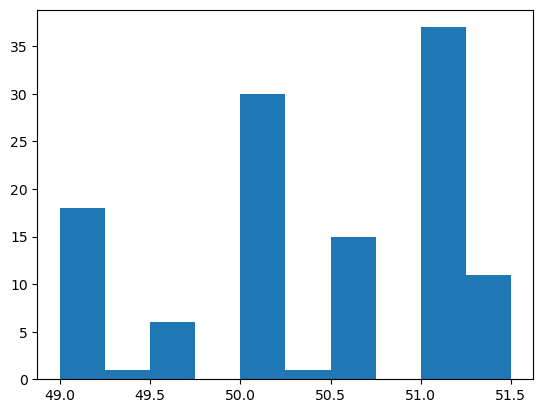

In [149]:
print('Histogram for males for lenght')
print(plt.hist(df_babies[df_babies['gender']=='Male']['blength']))


Histogram for females for lenght
(array([27.,  9.,  0., 36.,  0.,  6., 48.,  1.,  6.,  4.]), array([49. , 49.3, 49.6, 49.9, 50.2, 50.5, 50.8, 51.1, 51.4, 51.7, 52. ]), <BarContainer object of 10 artists>)


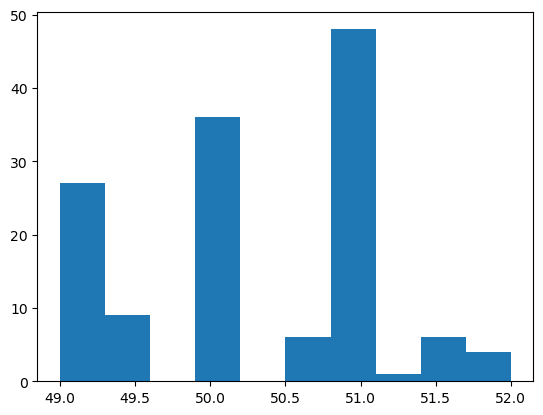

In [150]:
print('Histogram for females for lenght')
print(plt.hist(df_babies[df_babies['gender']=='Female']['blength']))

Histogram for males for weight
(array([ 5., 11., 23., 25., 23., 19., 10.,  1.,  1.,  1.]), array([2.7  , 2.892, 3.084, 3.276, 3.468, 3.66 , 3.852, 4.044, 4.236,
       4.428, 4.62 ]), <BarContainer object of 10 artists>)


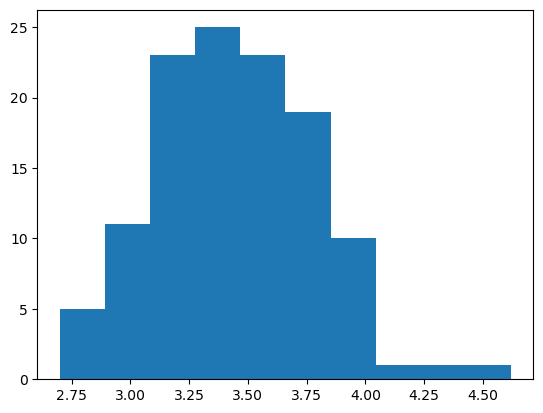

In [151]:
print('Histogram for males for weight')
print(plt.hist(df_babies[df_babies['gender']=='Male']['bweight']))


Histogram for males for weight
(array([12.,  9., 23., 25., 27., 14., 11., 11.,  2.,  3.]), array([2.71 , 2.911, 3.112, 3.313, 3.514, 3.715, 3.916, 4.117, 4.318,
       4.519, 4.72 ]), <BarContainer object of 10 artists>)


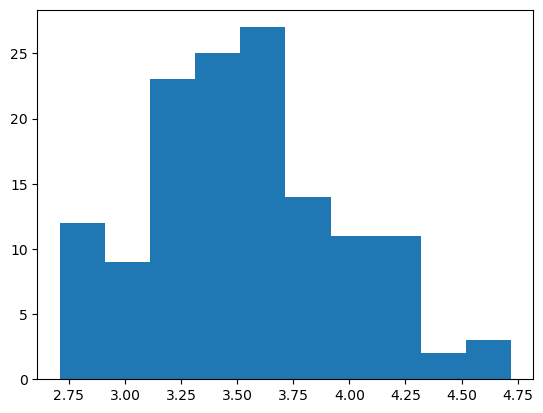

In [152]:
print('Histogram for males for weight')
print(plt.hist(df_babies[df_babies['gender']=='Female']['bweight']))


Histogram for males for head circumference
(array([ 3.,  3.,  4., 29., 13., 16., 36.,  3.,  8.,  4.]), array([31.5 , 32.15, 32.8 , 33.45, 34.1 , 34.75, 35.4 , 36.05, 36.7 ,
       37.35, 38.  ]), <BarContainer object of 10 artists>)


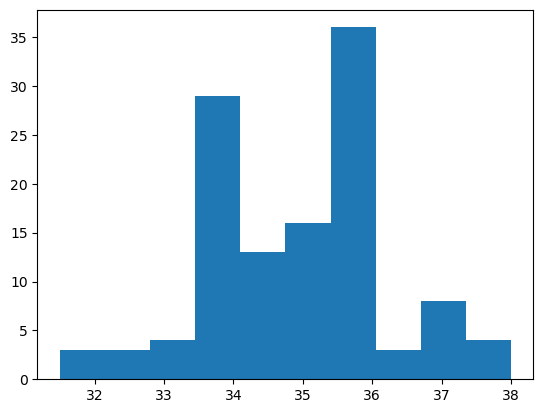

In [153]:
print('Histogram for males for head circumference')
print(plt.hist(df_babies[df_babies['gender']=='Male']['bheadcir']))


Histogram for males for for head circumference
(array([ 2.,  2.,  7.,  3., 32., 31., 31., 22.,  6.,  1.]), array([29.5 , 30.35, 31.2 , 32.05, 32.9 , 33.75, 34.6 , 35.45, 36.3 ,
       37.15, 38.  ]), <BarContainer object of 10 artists>)


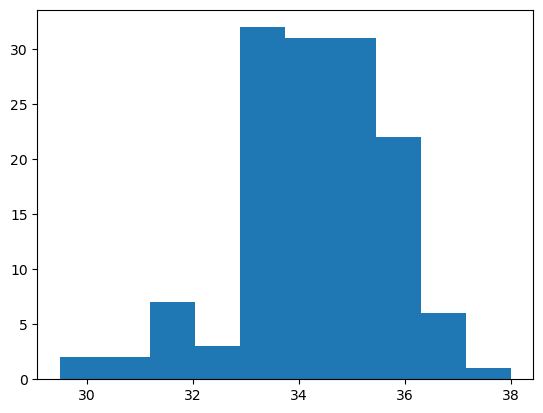

In [154]:
print('Histogram for males for for head circumference')
print(plt.hist(df_babies[df_babies['gender']=='Female']['bheadcir']))


### Hypothesis Testing

As we don't know the standard deviation of the population and also the sample size is more than 30. Therefore, we will use T-test.

And as gender independent of each other therefore we will use independent T-Tests


In [155]:
# Testing : There is no difference between males and females in length.
var1 = s.ttest_ind(df_babies[df_babies['gender']=='Male']['blength'], 
                     df_babies[df_babies['gender']=='Female']['blength'])

print(var1)

Ttest_indResult(statistic=0.5381314556693776, pvalue=0.5909575211763944)


#### As the pvalue=0.59095 is not less than 0.05 therefore we can say that result is not statistically significant. Therefore we cannot reject the null hypothesis "There is no difference between males and females in length."

In [156]:
# There is no difference between males and females weight.
var2 = s.ttest_ind(df_babies[df_babies['gender']=='Male']['bweight'], 
                     df_babies[df_babies['gender']=='Female']['bweight'])

print(var2)

Ttest_indResult(statistic=-1.8316170301260482, pvalue=0.06817960197726904)


#### As the pvalue=0.06817 is not less than 0.05 therefore we can say that result is not statistically significant. Therefore we cannot reject the null hypothesis "There is no difference between males and females in weight."

In [157]:
# There is no difference between males and females head circumference.
var3 = s.ttest_ind(df_babies[df_babies['gender']=='Male']['bheadcir'], 
                     df_babies[df_babies['gender']=='Female']['bheadcir'])

print(var3)

Ttest_indResult(statistic=4.081516072946304, pvalue=5.9967043494142434e-05)


#### As the pvalue=5.9967043494142434e-05 is less than 0.05 therefore we can say that result is statistically significant. Hence, we can reject the null hypothesis "There is no difference between males and females in head circumference."

### Calcualte the Effect Size

In [158]:
c1=df_babies[df_babies['gender']=='Male']['bweight']
c0=df_babies[df_babies['gender']=='Female']['bweight']
cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))

print(f"As the Cohen's D values is {cohens_d} therefore the Effect Size is 'Small'. \n The effect size is a measure of how important a difference is: large effect sizes mean the difference is important; small effect sizes mean the difference is unimportant.")

As the Cohen's D values is 0.23157483668378567 therefore the Effect Size is 'Small'. 
 The effect size is a measure of how important a difference is: large effect sizes mean the difference is important; small effect sizes mean the difference is unimportant.


## Data set 2

Description:
The spreadsheet surgery.xlsx contains the data for 141 babies who attended hospital for surgery, their length of stay and whether they had an infection during their stay.

Question:
Do babies who have an infection have a longer stay in the hospital?


In [159]:
df_sur = pd.read_excel('surgery.xlsx')
df_sur.head()



,id,gender,place,birthwt,gestatio,lengthst,infect,prematur,surgery
0,1,M,R,2020.0,36.0,NaN,no,Term,Other
1,2,M,R,1850.0,30.0,NaN,no,Term,Abdominal
2,3,M,L,2540.0,38.0,NaN,yes,Premature,Other
3,4,M,L,1150.0,31.0,NaN,yes,Premature,Other
4,5,M,L,3900.0,NaN,NaN,no,Term,Abdominal


### Null hypothesis:
- There is no relation between infection and longer stay.

### Variables:
- Independent continuous variables = birth weight, gestatio and length of stay
- Independent categorical variables = gender, place, infection, premature, surgery

### Descriptive Statistics

In [160]:
print('Descriptive statistics of Data set 2 \n')
df_sur.describe() 

Descriptive statistics of Data set 2 



,id,birthwt,gestatio,lengthst
count,141.000000,139.000000,133.000000,132.000000
mean,71.000000,2463.985612,36.563910,38.053030
std,40.847277,514.631611,2.048108,35.780568
min,1.000000,1150.000000,30.000000,0.000000
25%,36.000000,2085.000000,36.000000,20.750000
50%,71.000000,2425.000000,37.000000,27.000000
75%,106.000000,2832.500000,38.000000,42.000000
max,141.000000,3900.000000,41.000000,244.000000


In [161]:
df_sur.groupby('infect').describe()

id                                                      birthwt  \
       count       mean        std  min   25%   50%    75%    max   count   
infect                                                                      
no      85.0  68.341176  42.124971  1.0  32.0  68.0  103.0  141.0    83.0   
yes     56.0  75.035714  38.851215  3.0  43.5  82.5  108.5  131.0    56.0   

                     ... gestatio       lengthst                              \
               mean  ...      75%   max    count       mean        std   min   
infect               ...                                                       
no      2482.831325  ...     38.0  40.0     80.0  33.200000  33.146548   0.0   
yes     2436.053571  ...     38.0  41.0     52.0  45.519231  38.636816  11.0   

                                   
          25%   50%    75%    max  
infect                             
no      19.00  22.5  38.25  244.0  
yes     21.75  37.0  49.25  211.0  

[2 rows x 32 columns]

In [162]:
sk = s.skew(df_sur['lengthst'].dropna(), bias=False)
print('Skweness \n',sk)
print('\nKurtosis \n',df_sur.kurtosis())

Skweness 
 3.2117208963560135

Kurtosis 
 id          -1.200000
birthwt     -0.323024
gestatio     0.861749
lengthst    12.674782
dtype: float64


/var/folders/lk/gzlrlcl57h5grgsjxxtfg_sw0000gn/T/ipykernel_25840/3183385219.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('\nKurtosis \n',df_sur.kurtosis())


In [163]:
print('If we just look at the mean we can see the babies with infection on an average stay longer than babies with no infection. However, lets check its statistaical significance')

If we just look at the mean we can see the babies with infection on an average stay longer than babies with no infection. However, lets check its statistaical significance


Histogram for babies with no infection for length of stay
(array([45., 26.,  4.,  1.,  2.,  1.,  0.,  0.,  0.,  1.]), array([  0. ,  24.4,  48.8,  73.2,  97.6, 122. , 146.4, 170.8, 195.2,
       219.6, 244. ]), <BarContainer object of 10 artists>)

 We can see that the distribution is positively skwed


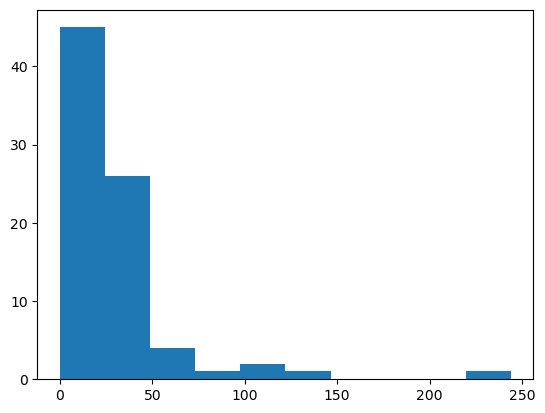

In [164]:
print('Histogram for babies with no infection for length of stay')
print(plt.hist(df_sur[df_sur['infect']=='no']['lengthst']))
print('\n We can see that the distribution is positively skwed')

Histogram for babies with infection for length of stay
(array([23., 19.,  3.,  2.,  1.,  1.,  1.,  1.,  0.,  1.]), array([ 11.,  31.,  51.,  71.,  91., 111., 131., 151., 171., 191., 211.]), <BarContainer object of 10 artists>)

 We can see that the distribution is positively skwed


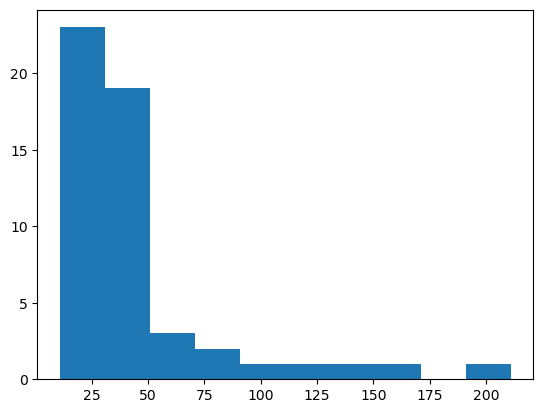

In [165]:
print('Histogram for babies with infection for length of stay')
print(plt.hist(df_sur[df_sur['infect']=='yes']['lengthst']))
print('\n We can see that the distribution is positively skwed')

### Hypothesis Testing

As we don't know the standard deviation of the population and also the sample size is more than 30. Therefore, we will use T-test.

And as infection is independent of each other therefore we will use independent T-Tests


In [166]:
var4 = s.ttest_ind(df_sur[df_sur['infect']=='yes']['lengthst'].dropna(), 
                     df_sur[df_sur['infect']=='no']['lengthst'].dropna())

print(var4)

Ttest_indResult(statistic=1.9535059124150023, pvalue=0.052907387292825195)


#### As the pvalue=0.05290 is not less than 0.05 therefore we can say that result is not statistically significant. Therefore we cannot reject the null hypothesis "There is no relation between infection and longer stay."

## Data set 3

Description:
The spreadsheet weights.xlsx contains the data from a population sample of 550 term babies who had their weight recorded at 1-month age. The babies also had their parity recorded, that is, their birth order in their family.

Question:
Are the weights of babies related to their parities?

In [167]:
df_wt = pd.read_excel('weights.xlsx')
df_wt.head()



,id,weight,length,headc,gender,education,parity
0,L001,3.95,55.5,37.5,female,tertiary,Three or more siblings
1,L003,4.63,57.0,38.5,female,tertiary,Singleton
2,L004,4.75,56.0,38.5,male,twelveYear,Two siblings
3,L005,3.92,56.0,39.0,male,tertiary,One sibling
4,L006,4.56,55.0,39.5,male,tenYear,Two siblings


### Null hypothesis:
- The weights of babies are not related to their parities.

### Variables:
- Independent continuous variables = birth weight, length, and headc.
- Independent categorical variables = gender, education, and parity.

### Descriptive Statistics

In [168]:

df_wt.describe()

#plt.scatter(df_wt[df_wt['parity']=='Singleton']['weight'],df_wt[df_wt['parity']=='One sibling']['weight'])
# print(len(df_wt[df_wt['parity']=='Singleton']['weight']))
# print(len(df_wt[df_wt['parity']=='One sibling']['weight']))

,weight,length,headc
count,550.000000,550.000000,550.000000
mean,4.366418,54.840909,37.895273
std,0.601822,2.406908,1.361564
min,2.920000,48.000000,34.000000
25%,3.950000,53.000000,37.000000
50%,4.330000,55.000000,38.000000
75%,4.770000,56.500000,39.000000
max,6.490000,62.000000,41.200000


In [169]:
sk = s.skew(df_wt['weight'], bias=False)
print('Skweness \n',sk)
print('\nKurtosis \n',df_wt.kurtosis())

Skweness 
 0.20089736916692574

Kurtosis 
 weight   -0.145887
length   -0.140907
headc    -0.205605
dtype: float64


/var/folders/lk/gzlrlcl57h5grgsjxxtfg_sw0000gn/T/ipykernel_25840/605264467.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('\nKurtosis \n',df_wt.kurtosis())


In [170]:
df_wt['parity'].unique()

array(['Three or more siblings', 'Singleton', 'Two siblings',
       'One sibling'], dtype=object)

### Hypothesis Testing

As we more than 2 groups. Therefore, we will use One-way ANOVA.


In [171]:
anova1 = s.f_oneway(
                  df_wt[df_wt['parity']=='Three or more siblings']['weight'], 
                  df_wt[df_wt['parity']=='Singleton']['weight'], 
                  df_wt[df_wt['parity']=='Two siblings']['weight'], 
                  df_wt[df_wt['parity']=='One sibling']['weight'])

print(anova1)

F_onewayResult(statistic=3.239101639759226, pvalue=0.021881235698982367)


#### As the pvalue=0.021881 is  less than 0.05 therefore we can say that result is statistically significant. Therefore we can reject the null hypothesis "The weights of babies are not related to their parities."

## Data set 4
Description:
The spreadsheet HD_Genes.xlsx contains the data from a population sample of 20 tissue samples of Controls and Huntington's disease (HD). They correspond to the expression level of 10 genes. Compare the expression level of each gene and see if it is dysregulated significantly (UP/Down regulated) in the pathological condition.
Bonus: Can you convert the expression values in the log scale before you start the analysis?

Question:
Are the genes significantly dysregulated in HD?


In [172]:
df_gen = pd.read_excel('HD_Genes.xlsx')
df_gen.head()



,Control,THBS3,SLC38A2,XG,DDR1,CCNB1,ZNF496,CRYM,SCIN,APOH,SMAD7,Gender
0,1,368.721,2959.913,4.617,1268.211,106.693,68.564,74.251,298.633,12.444,360.860,1
1,1,199.472,1424.950,-1.784,976.705,87.557,65.592,41.737,407.442,16.293,270.507,2
2,1,325.112,991.396,-0.435,996.661,123.843,57.359,42.892,438.320,28.228,232.537,1
3,1,196.999,1446.165,3.554,1067.007,116.166,58.857,37.111,199.610,28.187,363.876,1
4,1,289.603,2041.470,-1.648,966.763,180.954,52.872,68.329,248.039,11.964,292.587,1


### Null hypothesis:
- The genes not significantly dysregulated in HD.

### Variables:
- TODO

### Descriptive Statistics

In [173]:
df_gen.describe()

,Control,THBS3,SLC38A2,XG,DDR1,CCNB1,ZNF496,CRYM,SCIN,APOH,SMAD7,Gender
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,1.500000,252.090700,2710.555850,4.098450,1892.170000,100.740550,56.417350,52.028950,381.92530,19.905600,328.509200,1.250000
std,0.512989,96.600241,2341.287248,5.308168,997.635304,34.376723,17.055103,16.284804,165.93226,8.307898,109.993647,0.444262
min,1.000000,115.921000,991.396000,-2.387000,794.111000,56.710000,34.267000,29.711000,183.07400,-0.339000,180.450000,1.000000
25%,1.000000,185.788500,1463.722500,-0.701500,1049.420500,70.833000,42.455500,40.595750,277.18225,15.026250,237.042250,1.000000
50%,1.500000,203.068000,2009.894500,4.069000,1534.623000,96.497500,57.835500,46.823000,366.57600,19.494500,283.870500,1.000000
75%,2.000000,332.552750,2766.206750,7.070750,2879.945500,122.931750,66.335000,64.365250,437.20250,26.051500,381.979500,1.250000
max,2.000000,412.181000,11624.447000,14.312000,3880.899000,180.954000,101.746000,81.787000,938.37800,34.078000,552.254000,2.000000


In [174]:
sk = s.skew(df_gen, bias=False)
print('Skweness \n',sk)
print('\nKurtosis \n',df_gen.kurtosis())

Skweness 
 [ 0.          0.29771238  3.19161633  0.50506059  0.77113348  0.89545916
  0.81254944  0.49932911  1.98783431 -0.29647705  0.72990073  1.2505143 ]

Kurtosis 
 Control    -2.235294
THBS3      -1.344473
SLC38A2    11.791027
XG         -0.828231
DDR1       -0.865264
CCNB1       0.462941
ZNF496      1.031703
CRYM       -0.903736
SCIN        6.087680
APOH        0.548852
SMAD7      -0.667726
Gender     -0.496732
dtype: float64


In [175]:
df_gen_log = np.log(df_gen)
df_gen_log.head()


/Users/priyesh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Control,THBS3,SLC38A2,XG,DDR1,CCNB1,ZNF496,CRYM,SCIN,APOH,SMAD7,Gender
0,0.0,5.910040,7.992915,1.529745,7.145363,4.669956,4.227768,4.307451,5.699215,2.521239,5.888490,0.000000
1,0.0,5.295674,7.261892,NaN,6.884185,4.472290,4.183454,3.731388,6.009899,2.790736,5.600298,0.693147
2,0.0,5.784170,6.899114,NaN,6.904411,4.819015,4.049330,3.758685,6.082949,3.340314,5.449049,0.000000
3,0.0,5.283199,7.276671,1.268074,6.972613,4.755020,4.075111,3.613913,5.296365,3.338861,5.896813,0.000000
4,0.0,5.668511,7.621425,NaN,6.873953,5.198243,3.967874,4.224334,5.513586,2.481902,5.678762,0.000000


In [176]:
df_gen_log.describe()

,Control,THBS3,SLC38A2,XG,DDR1,CCNB1,ZNF496,CRYM,SCIN,APOH,SMAD7,Gender
count,20.000000,20.000000,20.000000,12.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,20.000000,20.000000
mean,0.346574,5.456414,7.704624,1.921395,7.418984,4.560394,3.990835,3.905642,5.871279,2.990211,5.744063,0.173287
std,0.355577,0.399253,0.584139,0.492506,0.510960,0.328435,0.296511,0.312034,0.384500,0.335718,0.322493,0.307939
min,0.000000,4.752909,6.899114,1.238084,6.677223,4.037951,3.534183,3.391517,5.209890,2.481902,5.195454,0.000000
25%,0.000000,5.224554,7.288714,1.527952,6.955562,4.260038,3.747302,3.702430,5.624669,2.769868,5.468232,0.000000
50%,0.346574,5.313384,7.605714,1.906260,7.335465,4.568425,4.057569,3.846136,5.902887,3.014014,5.648046,0.000000
75%,0.693147,5.806069,7.924439,2.359191,7.965506,4.811620,4.194532,4.163958,6.080395,3.265919,5.943701,0.173287
max,0.693147,6.021463,9.360866,2.661098,8.263822,5.198243,4.622480,4.404118,6.844153,3.528652,6.314008,0.693147


<AxesSubplot:>

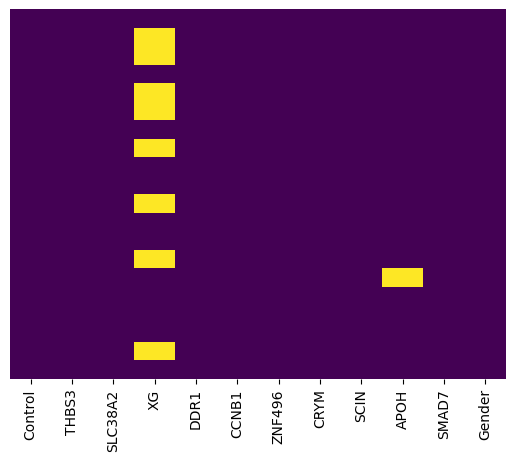

In [177]:
# Checking for null values
sns.heatmap(df_gen_log.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [178]:
# Removing null values
df_gen_log_na = df_gen_log.dropna()

### Hypothesis Testing

As we more than 2 groups. Therefore, we will use One-way ANOVA.


In [179]:
anova2 = s.f_oneway(
                  df_gen_log_na['THBS3'], 
                  df_gen_log_na['SLC38A2'],
                  df_gen_log_na['XG'],
                  df_gen_log_na['DDR1'],
                  df_gen_log_na['CCNB1'],
                  df_gen_log_na['ZNF496'],
                  df_gen_log_na['CRYM'],
                  df_gen_log_na['SCIN'],
                  df_gen_log_na['APOH'],
                  df_gen_log_na['SMAD7'])

print(anova2)

F_onewayResult(statistic=223.2789060876044, pvalue=4.6342551129625065e-62)


#### As the pvalue= 4.6342551129625065e-62 is  less than 0.05 therefore we can say that result is statistically significant. Therefore we can reject the null hypothesis "The genes not significantly dysregulated in HD."